In [82]:
import numpy as np
from scipy.sparse import csr_matrix
import scipy.sparse

def f(x):
    if x <= 0.5:
        return 1/4
    else:
        return -1/4
    
def build_A(N):
    rows   = [*range(0,16), *range(0,16)    , *range(1,16), 0 ]
    columns= [*range(0,16), *range(1,16), 0 , *range(0,16)    ]
    data   = np.concatenate(((2 * np.ones(16)), (-1 * np.ones(32))))

    # Create the CSR matrix
    # print(rows)
    # print(columns)
    # print(data)
    A = csr_matrix((data, (rows, columns)), shape=(N, N))

    print(A.toarray())

    return A + (1e-3)*np.eye(N)

def solve_poisson(N):
    x = np.linspace(0, 1, N)
    dx = 1/N
    print(dx)

    A = build_A(N)
    f_val = np.array([f(y) for y in x]) 
    F = dx**2 * f_val
    print(f_val)
    # print(F)

    # return np.invert(A) * F
    return scipy.sparse.linalg.spsolve(A, f_val)




In [83]:
import matplotlib.pyplot as plt

def plot_solution(cl_sol):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cl_sol, label='classical', color='black', linestyle='dashed')
    ax.legend()
    ax.set_xlabel('Node number')
    ax.set_ylabel('Components of solution')

    cnorm = np.linalg.norm(cl_sol)

    ax.text(0.55, 0.55, 'Norm (classical) = %.1f'%(cnorm), transform=ax.transAxes)
    
    return fig, ax

u = solve_poisson(16)
print(u)


0.0625
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Node number', ylabel='Components of solution'>)

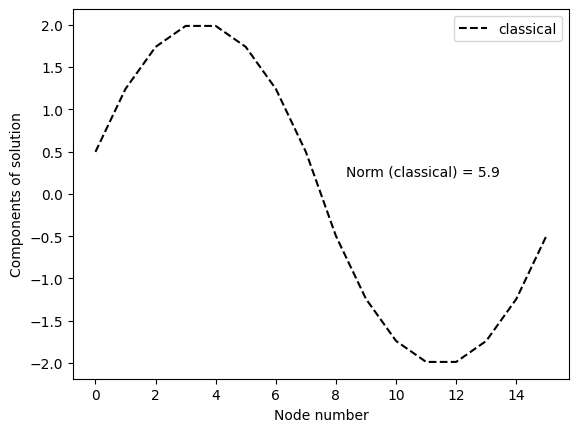

In [84]:
plot_solution(u)